# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
try:
    df = pd.read_csv('real_estate_data.csv', sep = '\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')
display(df.head(10))
df.info()
#проверим форматы в которых существуют наши данные,скорее всего некоторые типы будут некооректны

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

как и предполагалось + видим столбцы(которых много) с пропусками.
после оценки считаю, что можно объединить группы
1.нулевые значения +смена типа данных
2.столбцы с нулевыми значениями

1.
тип данных в first_day_exposition необходимо поменять на тип datetime
floors_total логически не может быть нецелочисленным и должен быть изменен на int + содержит нулевые значения
is_apartment должен иметь тип bool + нулевые значения
parks_around3000 и ponds_around3000 должны быть int(число озер и парков всегда целое) + нулевые значения
days_exposition необходимо поменять на int + нулевые значения
2.
ceiling_height \
living_area \
kitchen_area\
balcony \
locality_name
airports_nearest 
cityCenters_nearest  
parks_nearest 
ponds_nearest 


In [2]:
df.isna().sum() #посчитаем кол-во пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [3]:
#df.hist(figsize=(15, 60))

### Предобработка данных

In [4]:
df.duplicated().sum() 
# Дубликаты отсутствуют

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**До замены пропусков**

In [6]:
display(df[['first_day_exposition','parks_around3000','days_exposition','is_apartment']])

,first_day_exposition,parks_around3000,days_exposition,is_apartment
0,2019-03-07T00:00:00,1.0,NaN,NaN
1,2018-12-04T00:00:00,0.0,81.0,NaN
2,2015-08-20T00:00:00,1.0,558.0,NaN
3,2015-07-24T00:00:00,2.0,424.0,NaN
4,2018-06-19T00:00:00,2.0,121.0,NaN
...,...,...,...,...
23694,2017-03-21T00:00:00,1.0,NaN,NaN
23695,2018-01-15T00:00:00,NaN,45.0,NaN
23696,2018-02-11T00:00:00,NaN,NaN,NaN
23697,2017-03-28T00:00:00,2.0,602.0,NaN


In [7]:
#изменим типы данны, над пропусками надо будет подумать
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'],format= '%Y-%m-%d') 
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype(int)
#тут сразу заполним пропуски 0 т.к. перевод в int спропусками невозможет
df['ponds_around3000'] = df['ponds_around3000'].fillna(0).astype(int)
#df['days_exposition' ] = df['days_exposition' ].fillna(0).astype(int)
#df['is_apartment'] = df['is_apartment'].astype(bool)
#df['is_apartment'] = df['is_apartment'].fillna(value=False)

In [8]:
display(df[['first_day_exposition','parks_around3000','days_exposition','is_apartment']])
df['is_apartment'] = df['is_apartment'].fillna(value=False).astype(bool)


,first_day_exposition,parks_around3000,days_exposition,is_apartment
0,2019-03-07,1,NaN,NaN
1,2018-12-04,0,81.0,NaN
2,2015-08-20,1,558.0,NaN
3,2015-07-24,2,424.0,NaN
4,2018-06-19,2,121.0,NaN
...,...,...,...,...
23694,2017-03-21,1,NaN,NaN
23695,2018-01-15,0,45.0,NaN
23696,2018-02-11,0,NaN,NaN
23697,2017-03-28,2,602.0,NaN


In [9]:
#df['is_apartment'] = df['is_apartment'].astype(bool)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Комментарий про некорректность заполнения 0 в количестве дней объявления заставил подумать
действительно, заполняя 0 мы может расценить, что квартира была продана моментально
Решил посмотреть, как распределяются данные и построил график
Данные распределены нормально, пик в 0 говорит скорее всего о наличии пропусков
думал-думал, посмотрел и среднее и медиану и пришел к выводу, что 7% пропусков не так критичны и поэтому имеет смысл оставить как есть

In [11]:
display(df[['first_day_exposition','parks_around3000','days_exposition','is_apartment']])

,first_day_exposition,parks_around3000,days_exposition,is_apartment
0,2019-03-07,1,NaN,False
1,2018-12-04,0,81.0,False
2,2015-08-20,1,558.0,False
3,2015-07-24,2,424.0,False
4,2018-06-19,2,121.0,False
...,...,...,...,...
23694,2017-03-21,1,NaN,False
23695,2018-01-15,0,45.0,False
23696,2018-02-11,0,NaN,False
23697,2017-03-28,2,602.0,False


In [12]:
df['floors_total'] = df['floors_total'].fillna(0).astype(int) 

In [13]:
df.info()
#Форматы мы исмправили 
#будем работать с устранением пропусков
#начнем с ceiling_height 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [14]:
df['ceiling_height'].isna().value_counts()
                         

False    14504
True      9195
Name: ceiling_height, dtype: int64

In [15]:
df[df['ceiling_height'] > 5].sort_values('ceiling_height',ascending = False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1,223.0,3,30.0,19.0
22336,19,9999000.0,92.4,2019-04-05,2,32.0,6,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0,NaN,3,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3,53.0,2,False,...,8.0,NaN,Волхов,NaN,NaN,0,NaN,0,NaN,NaN
21377,19,4900000.0,42.0,2017-04-18,1,27.5,24,37.7,19,False,...,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0,NaN,0,NaN,61.0
22938,14,4000000.0,98.0,2018-03-15,4,27.0,2,73.0,2,True,...,9.0,1.0,деревня Нижняя,NaN,NaN,0,NaN,0,NaN,27.0
10773,8,3800000.0,58.0,2017-10-13,2,27.0,10,30.1,3,False,...,8.1,2.0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,71.0
21824,20,2450000.0,44.0,2019-02-12,2,27.0,2,38.0,2,False,...,8.6,2.0,городской поселок Большая Ижора,NaN,NaN,0,NaN,0,NaN,NaN
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25,17.0,17,False,...,NaN,2.0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,28.0
20478,11,8000000.0,45.0,2017-07-18,1,27.0,4,22.0,2,False,...,10.0,1.0,Санкт-Петербург,18975.0,3246.0,0,NaN,3,449.0,429.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,False,...,9.0,2.0,деревня Мины,NaN,NaN,0,NaN,0,NaN,540.0


здесь значение 5 тк это максимальная высота потолков, которую я смог представить в квартире
после данного среза видим аномальные значения, например 100 м потолки
записей с аномалбными данными 23 строки
учитывая данные аномалии проверим как они влияют на среднее  и медиану
видим, что разница между медианой и средним не велика, а значит можем сделать вывод, что данные выбросы не повлияют на результат
но считаю необходимым провести замену а медианое

In [16]:
df['ceiling_height'] = df.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True )
df['ceiling_height']

0        2.70
1        2.65
2        2.60
3        2.60
4        3.03
         ... 
23694    3.70
23695    2.50
23696    2.65
23697    3.00
23698    2.50
Name: ceiling_height, Length: 23699, dtype: float64

In [17]:
df['living_area'].describe()
#df['living_area'].isna().sum()
#тут я считаю аналогичная ситуация и пока заполнения не требует

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [18]:
#заполним пропуски с информацией о балконах
#считаю что если отсутствует информация о балконе, то значит она отсутствует
# а значит можно заполнить 0 и дополнительно изменить тип на целочисленный
df['balcony'] = df['balcony'].fillna(0).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Пока оставим данные в таком виде и перейдем к следующему шагу



### Посчитайте и добавьте в таблицу новые столбцы

Добавьте в таблицу новые столбцы со следующими параметрами:
цена одного квадратного метра;
день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
месяц публикации объявления;
год публикации объявления;
тип этажа квартиры (значения — «‎первый», «последний», «другой»);
расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [19]:
#что-бы найти стоимость квадратного метра разделить последнюю цену на площадб
# за это отвечают столбцы last_price, total_area
df['price_per_sqr'] = df['last_price']/df['total_area']
df['price_per_sqr'].astype(int)
# display(df['price_per_sqr'])

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: price_per_sqr, Length: 23699, dtype: int64

In [20]:
# Добавляем столбцы дня недели, месяца и года
df['weekday_public_announcement'] = df['first_day_exposition'].dt.weekday
df['month_public_announcement'] = df['first_day_exposition'].dt.month
df['year_publicannouncement'] = df['first_day_exposition'].dt.year


In [21]:
#для типов этажей применим категоризацию, которую напишем с помощью функции
def category_floor (row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    if floor == row['floors_total']:
        return 'последний'
    elif floor > 1 < floors_total:
        return 'другой'
df['floor_category'] = df.apply(category_floor, axis = 1)
display(df['floor_category'])

0        другой
1        первый
2        другой
3        другой
4        другой
          ...  
23694    другой
23695    другой
23696    первый
23697    другой
23698    первый
Name: floor_category, Length: 23699, dtype: object

In [23]:
df['cityCenters_nearest'] = df['cityCenters_nearest']/1000


In [26]:
display(df['cityCenters_nearest'])

0        16.028
1        18.603
2        13.933
3         6.800
4         8.098
          ...  
23694     4.232
23695       NaN
23696       NaN
23697    10.364
23698       NaN
Name: cityCenters_nearest, Length: 23699, dtype: float64

In [30]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].round()


In [34]:
df['cityCenters_nearest'] 

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_nearest, Length: 23699, dtype: float64

### Проведите исследовательский анализ данных

Проведите исследовательский анализ данных:
Изучите следующие параметры объектов:
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
этаж квартиры;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;
день и месяц публикации объявления.
Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.
Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление. 
 
Постройте гистограмму.
Посчитайте среднее и медиану.
В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?
Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.
Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.
Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

Самые большие квартиры:
19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
5893     500.0
15016    500.0
12401    495.0
Name: total_area, dtype: float64


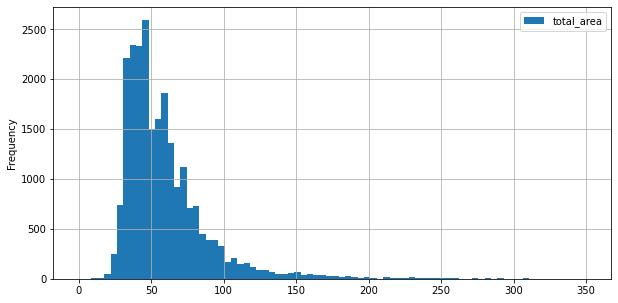

In [21]:
#Начнем с общей площади (total_area)
df.plot(y = 'total_area', kind = 'hist', bins = 80, grid=True, figsize = (10,5), range = (0,350))
print('Самые большие квартиры:')
print( df['total_area'].sort_values(ascending=False).head(10))

***Вывод:*** данные распределены нормально,присутствуют небольшие выбросы не влияющие на общю статистику
Видим, что большинство квартир в основном площадью до 100 квадратных метров.
также, есть часть квартир с площадью более 200 метров
и есть совсем аномальные квартиры с площадью по 400-900 квадратных метров
такое возможно, но выглядит неправдоподобно
могу предположить, что пики показывают деление по комнатам (1,2,3)

Самые большие квартиры по жилой площщади:
19540    409.7
5358     409.0
12401    347.5
4237     332.0
12859    322.3
660      312.5
8018     301.5
14088    300.0
20273    279.6
22494    274.0
Name: living_area, dtype: float64


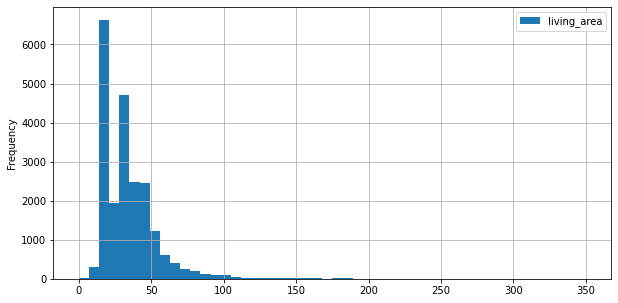

In [22]:
#жилая площадь
df.plot(y='living_area', kind = 'hist', bins = 50, grid=True, figsize = (10,5), range = (0,350))
print('Самые большие квартиры по жилой площщади:')
print( df['living_area'].sort_values(ascending=False).head(10))

По жилой площади основная масса квартир до 60 квадратных метров
также, есть квартиры от 80-100 метров, но их намного меньше
видим и аномалии свыше 200 квадратов

Самые большие квартиры по площади кухни:
19540    112.0
20215    107.0
2489     100.7
5358     100.0
16239     93.2
16797     93.0
10867     87.2
4394      77.0
492       77.0
14644     75.0
Name: kitchen_area, dtype: float64


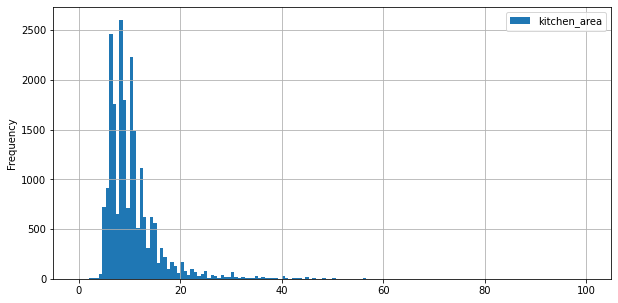

In [23]:
#площадь кухни
df.plot(y='kitchen_area', kind = 'hist', bins = 150, grid=True, figsize = (10,5), range = (0,100))
print('Самые большие квартиры по площади кухни:')
print( df['kitchen_area'].sort_values(ascending=False).head(10))

**Вывод**
Большинство кухонь от 5-15м
редко встречаются кухни от 15-30 м
есть и неадекватные значения, например кухни более 60 квадратов

Наибольшие по цене варианты:
12971    763000000.0
19540    420000000.0
14706    401300000.0
1436     330000000.0
15651    300000000.0
22831    289238400.0
16461    245000000.0
13749    240000000.0
5893     230000000.0
8900     190870000.0
Name: last_price, dtype: float64


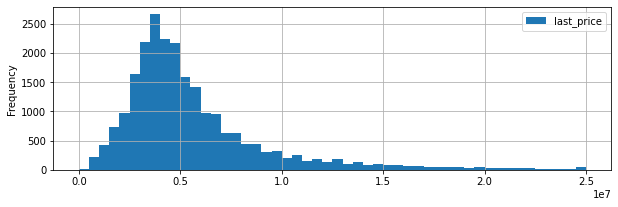

In [24]:
df.plot(y = 'last_price', kind = 'hist', bins = 50, grid=True, range = (0,25000000), figsize = (10,3))
df['last_price'].describe().round()
print('Наибольшие по цене варианты:')
print(df['last_price'].sort_values(ascending=False).head(10))
#тут тоже распределяются нормально данные

**Вывод**
Большинстово вартир стоят в среднем до 5-5,5 млн р
Также есть аномальные значения стоимости, например 763 млн р

Наибольшие по кол-ву комнат варианты:
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
9688     11
648      11
18119    10
4149     10
Name: rooms, dtype: int64


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqr,weekday_public_announcement,month_public_announcement,year_publicannouncement,floor_category
839,14,1900000.0,35.0,2017-04-14,0,2.700,5,15.0,3,False,...,0,NaN,0,NaN,7,54285.714286,4,4,2017,другой
4930,6,2176000.0,23.0,2017-12-08,0,2.900,4,19.0,1,False,...,1,484.0,3,214.0,7,94608.695652,4,12,2017,первый
5855,3,945750.0,19.5,2017-09-18,0,2.760,3,12.7,2,False,...,0,NaN,0,NaN,3,48500.000000,0,9,2017,другой
7256,16,3500000.0,29.2,2017-04-16,0,2.640,16,16.7,3,False,...,0,NaN,0,NaN,28,119863.013699,6,4,2017,другой
10534,10,2100000.0,26.7,2018-08-03,0,2.700,17,14.2,7,False,...,0,NaN,0,NaN,18,78651.685393,4,8,2018,другой
20584,12,2170000.0,22.2,2018-11-04,0,2.735,18,16.6,7,False,...,0,NaN,0,NaN,36,97747.747748,6,11,2018,другой


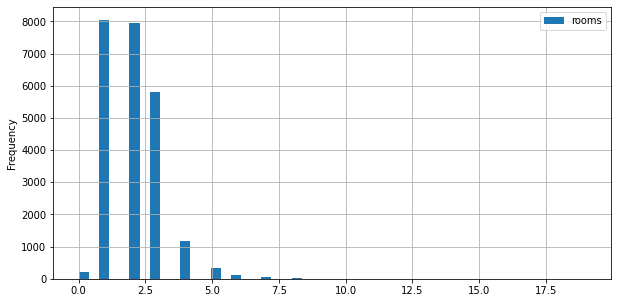

In [25]:
df.plot(y = 'rooms', kind = 'hist', bins = 50, grid=True, figsize = (10,5))
print('Наибольшие по кол-ву комнат варианты:')
print(df['rooms'].sort_values(ascending=False).head(10))

df.query('rooms == 0 and is_apartment == False ') # убедился, что  квартиры являются апартаментами т.е. без комнат

Cамые высокие потолки:
22869    100.0
22336     32.0
3148      32.0
21377     27.5
22938     27.0
4876      27.0
10773     27.0
5807      27.0
5246      27.0
20478     27.0
Name: ceiling_height, dtype: float64


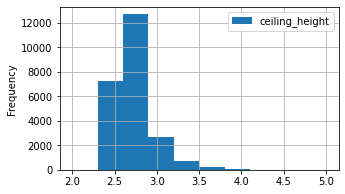

In [26]:
#высота потолков
df.plot(y = 'ceiling_height', kind = 'hist', bins = 10, range = (2,5), grid=True, figsize = (5,3))
print('Cамые высокие потолки:')
print(df['ceiling_height'].sort_values(ascending=False).head(10))


**Вывод**:
Большинство потолков высотой 2,7 м
также график показывает, что диапазон высоты потолков 2,2-3, что соответствует нормальной высоте потолков в среднестатистической квартире
В данных мы видим значения от 20-100 кв м
в скорее всего это значения/10 = 2,7 м
ну, а 100 м аномалия

In [27]:
#df.query('ceiling_height == 2.5 and ceiling_height < 3')
#df[df['ceiling_height']>=15].sort_values('ceiling_height')
#df.query('ceiling_height > 15')



Распределение по этажам:
18218    33
11575    32
18629    31
1917     30
11079    29
397      28
8496     27
16644    27
12888    27
6157     27
Name: floor, dtype: int64


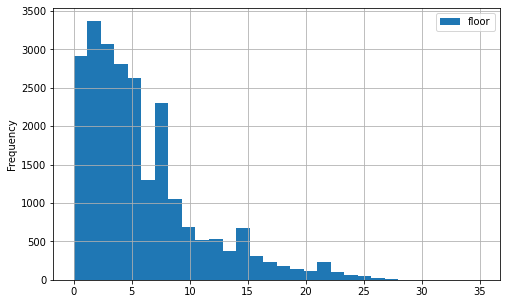

In [28]:
# по этажности
df.plot(y = 'floor', kind = 'hist', bins = 30, range = (0,35), grid=True, figsize = (8,5))
print('Распределение по этажам:')
print(df['floor'].sort_values(ascending=False).head(10))
#данные распределяются корректно

**Вывод:**
Большинство квартир находятся с 0-7 этаж
также,судя по графику почти все квартиры продают в домах типовой застройки
Аномальных значений не зафиксировал

Распределение по расстоянию до центра города:
9640     65.968
5340     65.952
577      65.764
20746    65.105
5218     64.857
18884    62.706
2974     62.454
16569    61.495
23123    60.223
4441     59.626
Name: cityCenters_nearest, dtype: float64


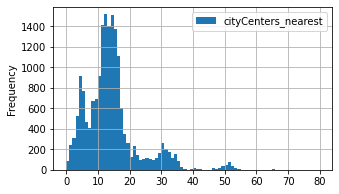

In [29]:
# до центра города
df.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 80, range = (0,80), grid=True, figsize = (5,3))
print('Распределение по расстоянию до центра города:')
print(df['cityCenters_nearest'].sort_values(ascending=False).head(10))

**Вывод:**
Квартиры продают, как в самом центре города (их мало)
так и в пригороде 
основной диапазон удаленности от 8-20 км, что характерно для крупного города

Распределение по расстоянию до аэропорта:
9640     84869.0
5340     84853.0
577      84665.0
20746    84006.0
5218     83758.0
18884    81607.0
2974     81355.0
4441     78527.0
939      75646.0
376      73827.0
Name: airports_nearest, dtype: float64


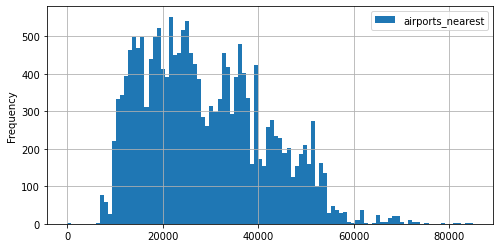

In [30]:
#по удаленности от аэропорта
df.plot(y = 'airports_nearest', kind = 'hist', bins = 100, range = (0,85000), grid=True, figsize = (8,4))
print('Распределение по расстоянию до аэропорта:')
print(df['airports_nearest'].sort_values(ascending=False).head(10))
#df['airports_nearest'].sort_values(ascending= False)
#df.query('airports_nearest <8000')

**Вывод:**
Максимальная удаленность от аэропорта 84км
основной диапазон удаленности от аэропорта 10-30км 
диапазон 30-45 км характерене для пригорода

Распределение по расстоянию до парка:
10959    3190.0
19430    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
2659     2905.0
1860     2888.0
7855     2880.0
3865     2847.0
22003    2768.0
Name: parks_nearest, dtype: float64


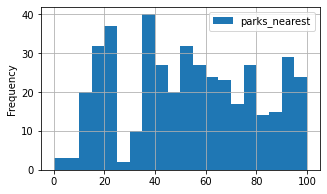

In [31]:
# по удаленности от парка
df.plot(y = 'parks_nearest', kind = 'hist', bins = 20, range = (0,100), grid=True, figsize = (5,3))
print('Распределение по расстоянию до парка:')
print(df['parks_nearest'].sort_values(ascending=False).head(10))


**Вывод:** Максимаьная удаленность от парка чуть более 3 км


Распределение по дню публикации объявления:
17638    12
19699    12
19695    12
11787    12
11780    12
2674     12
2675     12
11770    12
11769    12
2688     12
Name: month_exposition, dtype: int64


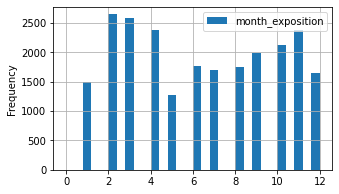

In [32]:
# по месяцу публикации объявления
df['month_exposition'] = df['first_day_exposition'].dt.month

df.plot(y = 'month_exposition', kind = 'hist', bins = 30, range = (0,12), grid=True, figsize = (5,3))
print('Распределение по дню публикации объявления:')
print(df['month_exposition'].sort_values(ascending=False).head(10))

Распределение по дню публикации объявления:
12995    31
453      31
13206    31
3626     31
3663     31
18856    31
22704    31
13002    31
12961    31
18034    31
Name: day_exposition, dtype: int64


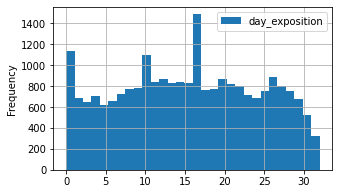

In [33]:
# по дню публикации объявления
#df.drop(columns= 'day_month_exposition', inplace = True)
df['day_exposition'] = df['first_day_exposition'].dt.day

df.plot(y = 'day_exposition', kind = 'hist', bins = 30, range = (0,32), grid=True, figsize = (5,3))
print('Распределение по дню публикации объявления:')
print(df['day_exposition'].sort_values(ascending=False).head(10))

count    23699.000000
mean        15.481582
std          8.642389
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         31.000000
Name: day_exposition, dtype: float64

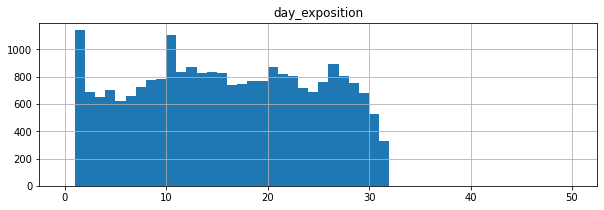

In [34]:
#df['day_exposition'].plot(kind= 'bar', bins = 30, figsize = (0,10))
df.hist(column = 'day_exposition', bins = 50, range = (0,50), grid=True, figsize = (10,3))
df['day_exposition'].describe()

array([[<AxesSubplot:title={'center':'month_exposition'}>]], dtype=object)

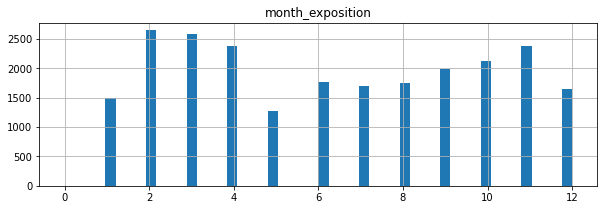

In [35]:
df.hist(column = 'month_exposition', bins = 50, range = (0,12), grid=True, figsize = (10,3))

**Вывод:** Максимальное кол-во объявлений 1 квартал и первый месяц второго
попробую обосновать по месяцам:
январь-финансово тяжелый месяц, бюджеты восстанавливаются после новогодних праздников
февраль,март,апрель - реакция на возможное появленияе финансов у населения + готовность объектов
дальше мы видим спад к летнему периоду, периоду отпусков. Кол-во объявлений падает +- к уровню декабря-января
ps.Если бы учитывались объявления об аренде квартир, то можно было предположить, что рост осенью вызван кол-вом студентов и работников, приезжающих на зарботки
но тут я думаю достраиваемое жилье сдается в эксплуатацию или распродаются остатки

Изучите, как быстро продавались квартиры ***(столбец days_exposition)***. Этот параметр показывает, сколько дней было размещено каждое объявление. 
 
**Постройте гистограмму. \
Посчитайте среднее и медиану.\
В ячейке типа markdown опишите, сколько времени обычно занимает продажа. \
Какие продажи можно считать быстрыми, а какие — необычно долгими?**

(1.0, 1000.0)

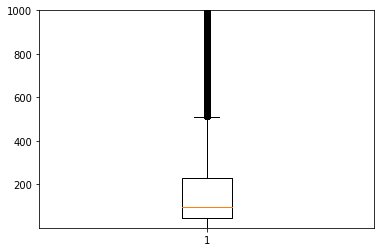

In [36]:
import matplotlib.pyplot as plt
plt.boxplot(df[df['days_exposition']!= 0]['days_exposition'])
plt.ylim(1,1000)


#среднее значение, медиана 
#df[df['days_exposition']!=0]['days_exposition'].describe()
#df[df['days_exposition']!=0]['days_exposition'].value_counts()



<AxesSubplot:ylabel='Frequency'>

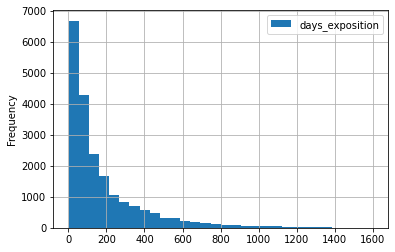

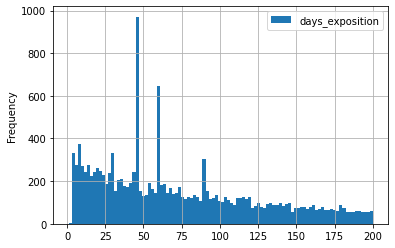

In [37]:

df.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))
df.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200))

In [38]:
df[df['days_exposition']!=0].mean().round()


/tmp/ipykernel_48/1954955892.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[df['days_exposition']!=0].mean().round()


total_images                        10.0
last_price                     6266173.0
total_area                          59.0
rooms                                2.0
ceiling_height                       3.0
floors_total                        11.0
living_area                         34.0
floor                                6.0
is_apartment                         1.0
studio                               0.0
open_plan                            0.0
kitchen_area                        10.0
balcony                              1.0
airports_nearest                 28840.0
cityCenters_nearest                 14.0
parks_around3000                     0.0
parks_nearest                      491.0
ponds_around3000                     1.0
ponds_nearest                      520.0
days_exposition                    181.0
price_per_sqr                    98027.0
weekday_public_announcement          3.0
month_public_announcement            7.0
year_publicannouncement           2017.0
month_exposition

In [39]:
df[df['days_exposition']!=0].median().round()

/tmp/ipykernel_48/3075711684.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df[df['days_exposition']!=0].median().round()


total_images                         9.0
last_price                     4500000.0
total_area                          51.0
rooms                                2.0
ceiling_height                       3.0
floors_total                         9.0
living_area                         30.0
floor                                4.0
is_apartment                         1.0
studio                               0.0
open_plan                            0.0
kitchen_area                         9.0
balcony                              0.0
airports_nearest                 26768.0
cityCenters_nearest                 13.0
parks_around3000                     0.0
parks_nearest                      451.0
ponds_around3000                     0.0
ponds_nearest                      504.0
days_exposition                     95.0
price_per_sqr                    94068.0
weekday_public_announcement          3.0
month_public_announcement            7.0
year_publicannouncement           2017.0
month_exposition

In [40]:
df['days_exposition'].describe().round()
df[df['days_exposition'] == 0]
#вот тут я чуть не попался сам на свою удочку забыв, что пропуски заполнил нулями
#поэому возьмем срез от 1 т.е. != 0 
df.query('days_exposition != 0')['days_exposition'].describe().round()

count    20518.0
mean       181.0
std        220.0
min          1.0
25%         45.0
50%         95.0
75%        232.0
max       1580.0
Name: days_exposition, dtype: float64

**ВЫВОД** \
**Медианное время продажи - 95 дней** \
**Среднее время продажи - 181 день** \
Самая быстрая продажа всего за несколько дней после размещения объявления, а также есть варианты, продажа которых заняла несколько лет.

По графикам и описанию диапахон до  **45 дней** можно отнесть к каиегори ***быстрая продажа***.  **230 дней**  - ***долгая продажа*** \
также есть выбросы в районе 30,45,60,90 дней
если често сходу ответить на вопрос почему выбросы на таких диапазонах я не смог и воспользовался услугами интернета. По запросу ***что происходит с объявлениями яндекс недвижимость через 45,60,90 дней*** на официальной странице Яндекс лежит таблица со сроками публикации в городах РФ.https://yandex.ru/support/realty/paid.html \
Как раз тут и стали фигурировать эти значения и можно предположить, что аномалии вызваны снятием объявлений

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**
Изучите, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

            last_price  total_area
last_price    1.000000    0.738972
total_area    0.738972    1.000000 



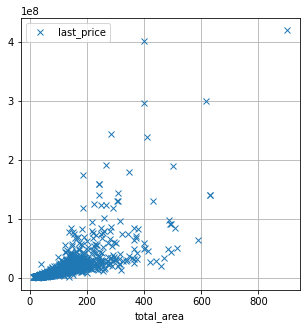

In [41]:
#Зависимость цены от площади квартиры
df.pivot_table(index='total_area', values='last_price') \
    .plot(grid=True, style='x', figsize=(5, 5))
print(df.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

             last_price  living_area
last_price     1.000000     0.655849
living_area    0.655849     1.000000 



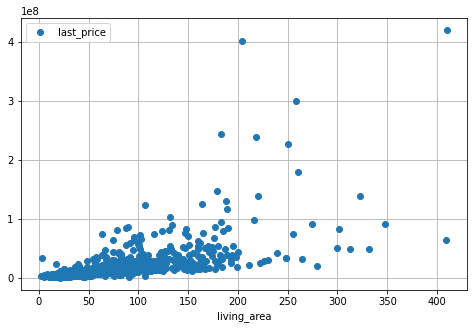

In [42]:
#Зависимость цены от жилой площади

df.pivot_table(index='living_area', values='last_price') \
    .plot(grid=True, style='o', figsize=(8, 5))
print(df.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

              kitchen_area  last_price
kitchen_area      1.000000    0.361686
last_price        0.361686    1.000000 



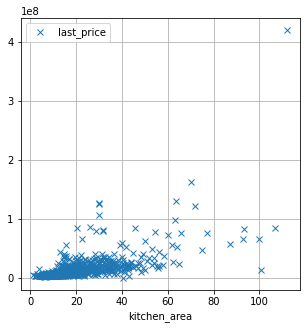

In [43]:
#Зависимость цены от площади кухни

df.pivot_table(index='kitchen_area', values='last_price') \
    .plot(grid=True, style='x', figsize=(5, 5))
print(df.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

            last_price     rooms
last_price    1.000000  0.435171
rooms         0.435171  1.000000 



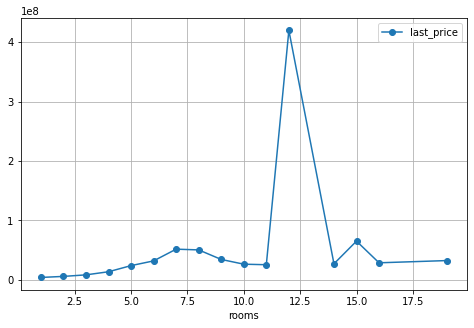

In [44]:
#Зависимость цены от количества комнат
df.query('rooms > 0').pivot_table(index='rooms', values='last_price') \
    .plot(grid=True, style='o-', figsize=(8, 5))
print(df.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')


<AxesSubplot:xlabel='month_exposition'>

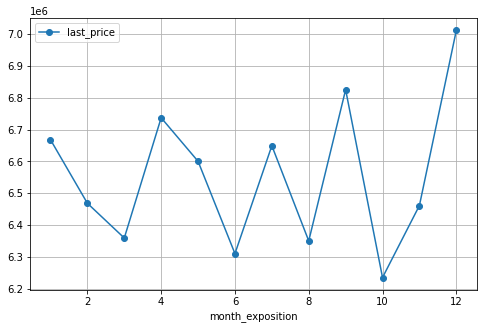

In [45]:
#Зависимость цены от даты размещения(месяц)
df.pivot_table(index = 'month_exposition', values = 'last_price') \
  .plot(grid=True, style='o-', figsize=(8, 5))


**Вывод:** Явный пик в декабре может быть обусловлен годовыми накоплениями покупателей + квартальные/годовые премии, позволяющие сделать покупку.
Пик в 4 месяце может быть обусловлен восстановлением дельты денежных средств, потраченных на новогодние праздники. Вообще прослеживается связь с массовостью сдачи объектов


<AxesSubplot:xlabel='day_exposition'>

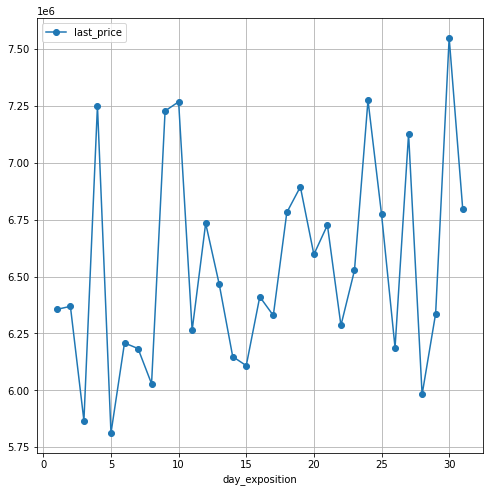

In [46]:
#Зависимость цены от даты размещения(день неделя)
df.pivot_table(index='day_exposition', values='last_price') \
    .plot(grid=True, style='o-', figsize=(8, 8))

**Вывод:** Пиковые значения по дням находятся в диапазоне зарплатных и авансовых дат. Предполагаю, что пики вызваны этим

<AxesSubplot:xlabel='year_publicannouncement'>

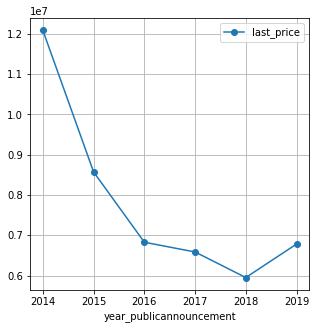

In [47]:
df.pivot_table(index='year_publicannouncement', values='last_price') \
    .plot(grid=True, style='o-', figsize=(5, 5))

Самая высокая цена была в **2014 г.**
Объяснимо геополитической обстановкой и резким "взлетом" курса валют и падением рубля
Постепенно рынок реанимировался и ценовой диапазон начал стабилизацию. Т.к. скорее всего по ценам 2014 и снижению доходов населения

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце **locality_name**.

In [48]:
# за 10 городов возьмем первые 10 из таблицы
ten_cities = df['locality_name'].value_counts().head(10)
ten_cities_price_per_sqr = df[df['locality_name'].isin(ten_cities.index)]
ten_cities_price_per_sqr.groupby('locality_name').mean('price_per_sqr').sort_values('price_per_sqr', ascending = False)


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqr,weekday_public_announcement,month_public_announcement,year_publicannouncement,month_exposition,day_exposition
locality_name,,,,,,,,,,,,,,,,,,,,,
Санкт-Петербург,10.180205,8.062507e+06,64.751488,2.171618,2.770180,11.345143,36.959148,6.242033,0.885885,0.005470,...,498.597886,0.767445,520.213955,158.572610,114849.008794,2.556262,6.421983,2017.351886,6.421983,15.452516
Пушкин,9.330623,6.469036e+06,61.552791,2.018970,2.671911,4.986450,34.813797,2.943089,0.869919,0.000000,...,404.297170,0.872629,482.988701,174.365854,103125.819291,2.452575,6.192412,2017.227642,6.192412,15.455285
деревня Кудрово,8.685619,4.234158e+06,46.571739,1.438127,2.727124,18.501672,23.607595,9.919732,0.839465,0.020067,...,NaN,0.000000,NaN,180.872910,92473.547576,2.809365,6.414716,2016.916388,6.414716,14.832776
посёлок Парголово,8.694190,4.488075e+06,51.521407,1.605505,2.627951,22.070336,24.965748,12.015291,0.874618,0.006116,...,501.100000,0.290520,598.071429,143.614679,90175.913458,2.648318,6.562691,2017.360856,6.562691,15.379205
посёлок Мурино,8.666667,3.672049e+06,44.133448,1.392720,2.791169,19.547893,22.795466,10.842912,0.896552,0.038314,...,NaN,0.000000,NaN,146.159004,85752.189195,2.496169,6.942529,2017.490421,6.942529,15.379310
посёлок Шушары,8.800000,4.108082e+06,53.821273,1.804545,2.643273,12.684091,28.974109,6.952273,0.868182,0.009091,...,NaN,0.345455,573.217105,144.750000,78677.364217,2.725000,6.411364,2017.320455,6.411364,15.886364
Колпино,8.855030,3.964021e+06,53.231479,2.130178,2.603580,8.940828,31.791220,4.896450,0.872781,0.000000,...,495.481203,0.994083,532.268421,130.855030,75424.579098,2.508876,6.461538,2017.417160,6.461538,15.440828
Гатчина,9.009772,3.488337e+06,50.942932,1.921824,2.677443,5.700326,29.861849,3.342020,0.856678,0.000000,...,NaN,0.000000,NaN,165.530945,68746.146763,2.456026,6.065147,2017.283388,6.065147,15.713355
Всеволожск,10.253769,3.789068e+06,56.022186,1.914573,2.666482,8.391960,30.846469,4.610553,0.891960,0.015075,...,NaN,0.000000,NaN,167.869347,68654.473986,2.502513,6.515075,2017.361809,6.515075,15.055276


**Вывод:**
Самая большая стоимость квадратного метра в СПБ
НА 2  месте город Пушкин, что ожидаемо, т.к. находится близко к Санкт-Петербургу
и скорее всего имеет застройку.
на последнем месте Выборг по понятным соображениям, открытая местность у воды, неособо развитая инфраструктура, удаленность от СПБ

Выделите квартиры в Санкт-Петербурге с помощью столбца **locality_name** и вычислите среднюю цену **каждого километра**. Опишите, как стоимость объектов зависит от расстояния до центра города.
Опишите, как стоимость объектов зависит от расстояния до центра города.

In [49]:
to_centr_spb = df[df['locality_name'] == 'Санкт-Петербург'].sort_values('price_per_sqr')
to_centr_spb.groupby('cityCenters_nearest').median('price_per_sqr')


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqr,weekday_public_announcement,month_public_announcement,year_publicannouncement,month_exposition,day_exposition
cityCenters_nearest,,,,,,,,,,,,,,,,,,,,,
0.181,2.0,31099000.0,159.0,5.0,3.28,5.0,106.00,5.0,1.0,0.0,...,254.0,3.0,426.0,0.0,195591.194969,0.0,6.0,2018.0,6.0,25.0
0.208,1.0,5800000.0,33.6,1.0,3.70,7.0,22.80,4.0,0.0,0.0,...,304.0,3.0,503.0,167.0,172619.047619,3.0,3.0,2016.0,3.0,10.0
0.215,7.0,10990000.0,100.0,3.0,3.90,5.0,37.80,3.0,1.0,0.0,...,229.0,2.0,511.0,265.0,109900.000000,2.0,12.0,2015.0,12.0,16.0
0.287,18.0,9590000.0,108.0,2.0,3.30,5.0,59.00,2.0,0.0,0.0,...,359.0,3.0,290.0,69.0,88796.296296,1.0,5.0,2017.0,5.0,23.0
0.291,18.0,11500000.0,113.5,3.0,4.20,7.0,44.20,6.0,1.0,0.0,...,472.0,2.0,94.0,0.0,101321.585903,0.0,9.0,2018.0,9.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28.644,13.0,4775000.0,56.5,2.5,2.60,5.0,32.85,1.0,0.5,0.0,...,NaN,0.0,NaN,301.0,85191.334598,1.0,5.5,2016.5,5.5,11.5
28.806,20.0,4370000.0,54.7,3.0,2.50,5.0,32.80,5.0,1.0,0.0,...,NaN,0.0,NaN,939.0,79890.310786,2.0,3.0,2016.0,3.0,23.0
29.263,20.0,4850000.0,85.8,3.0,3.60,3.0,49.40,2.0,1.0,0.0,...,NaN,0.0,NaN,0.0,56526.806527,0.0,4.0,2019.0,4.0,22.0


<AxesSubplot:xlabel='cityCenters_nearest'>

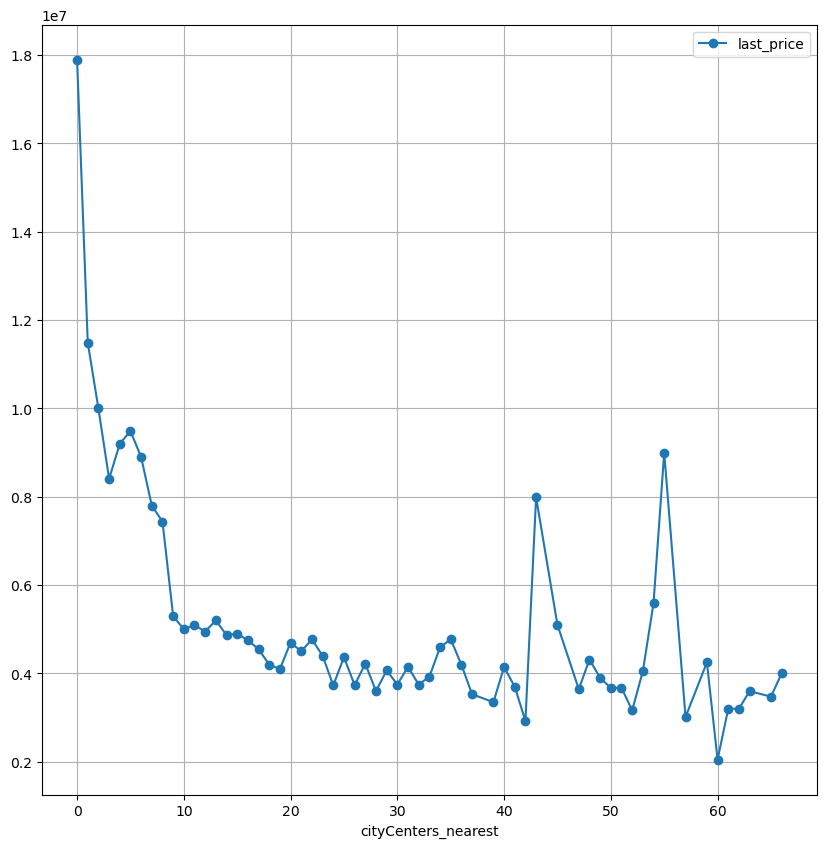

In [44]:
df.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median') \
    .plot(grid=True, style='o-', figsize=(10, 10))

**Вывод:**
Как и ожидалось, максимальная стоимость квартиры ближе к центру \
Максимальная удаленность от Центра стоимость в 2 раза меньше

In [ ]:
df['cityCenters_nearest']

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_nearest, Length: 23699, dtype: float64

### Общий вывод

**Стоимость квадратного метра в 10 населенных пунктах:** \
в ***Санкт-Петребурге - 114849*** \
в ***Выборге - 58142***

**Срок продажи квартиры** \
Самые частые продажи происходят за *95 дней.* \
Быстрой продажей считается 45 дней \
Долгой продаже *230 дней*

**Факторы влияющие на стоимость**
площадь\день месяца \месяц \
самый дорогой месяц декабрь,т.к. возрастающий спрос и наличие денег могут повлиять на этот фактор.
Также замечено влияние по кварталам, которое может быть обусловлено восстановлением платежеспособности (апрель), также влияет фактор  жтлья в наличии, при готовности объектов возрастает и цена.
Еще обратил внимание, что первый этаж дешевле остальных

**По Санкт-Петербургу:**
На стоимость квартиры влияет удаленность от центра, однако заметил перепады в стоиомости при одинаковой удаленности от центра. По комнатам нет какой-либо свзи, т.к. есть очень дорогие квартиры с 1 комнатой